In [ ]:
import requests
from collections import Counter
import string

In [ ]:
fileA = "https://raw.githubusercontent.com/amaydixit11/Academics/refs/heads/main/DSL253/assignment_1/fileA.txt"
fileB = "https://raw.githubusercontent.com/amaydixit11/Academics/refs/heads/main/DSL253/assignment_1/fileB.txt"
fileC = "https://raw.githubusercontent.com/amaydixit11/Academics/refs/heads/main/DSL253/assignment_1/fileC.txt"
fileD = "https://raw.githubusercontent.com/amaydixit11/Academics/refs/heads/main/DSL253/assignment_1/fileD.txt"

In [ ]:
def partA(url):
  response = requests.get(url)
  text = response.text

  text = text.lower()
  text = ''.join(filter(str.isalpha, text))

  letter_counts = Counter(text)

  total_letters = sum(letter_counts.values())
  letter_details = [
      {"letter": letter, "count": count, "frequency": count / total_letters}
      for letter, count in letter_counts.items()
  ]

  top_ten_letters = sorted(letter_details, key=lambda item: item["frequency"], reverse=True)[:10]

  print("Top ten letters with their counts and probabilities in FileA:")
  for detail in top_ten_letters:
      print(
          f"Letter: {detail['letter']}, "
          f"Count: {detail['count']}, "
          f"Probability: {detail['frequency']:.4f}"
      )
partA(fileA)

Top ten letters with their counts and probabilities in FileA:
Letter: s, Count: 426, Probability: 0.0424
Letter: z, Count: 415, Probability: 0.0413
Letter: y, Count: 415, Probability: 0.0413
Letter: f, Count: 410, Probability: 0.0408
Letter: w, Count: 405, Probability: 0.0403
Letter: t, Count: 403, Probability: 0.0401
Letter: u, Count: 403, Probability: 0.0401
Letter: x, Count: 402, Probability: 0.0400
Letter: j, Count: 400, Probability: 0.0398
Letter: k, Count: 398, Probability: 0.0396


In [ ]:
def partB(url):
  response = requests.get(url)
  text = response.text

  text = text.lower()
  text = ''.join(filter(str.isalpha, text))
  # print(len(text))

  letter_counts = Counter(text)

  total_letters = sum(letter_counts.values())
  # print(total_letters)
  letter_probabilities = {letter: count / total_letters for letter, count in letter_counts.items()}

  entropy = -sum(p * math.log2(p) for p in letter_probabilities.values())

  print(f"Entropy of the English alphabets in FileB: {entropy:.4f}")
partB(fileB)

Entropy of the English alphabets in FileB: 4.1760


In [ ]:
import requests
from collections import Counter
import math

def fetch_and_preprocess(url):
    response = requests.get(url)
    text = response.text
    text = text.lower()

    text = ''.join(char if char.isalnum() or char.isspace() else ' ' for char in text)

    words = text.split()
    return words

def compute_probabilities(words):
    total_words = len(words)
    word_counts = Counter(words)
    word_probabilities = {word: count / total_words for word, count in word_counts.items()}
    return word_counts, word_probabilities

def entropy(probabilities):
    return -sum(p * math.log2(p) for p in probabilities.values())

In [ ]:
words_fileC = fetch_and_preprocess(fileC)
word_counts_fileC, word_probabilities_fileC = compute_probabilities(words_fileC)

top_ten_words = sorted(word_probabilities_fileC.items(), key=lambda item: item[1], reverse=True)[:10]

print("Top ten words with their counts and probabilities from fileC:")
for word, probability in top_ten_words:
    print(f"Word: '{word}', Count: {word_counts_fileC[word]}, Probability: {probability:.4f}")

words_fileC = fetch_and_preprocess(fileC)
_, word_probabilities_fileC = compute_probabilities(words_fileC)

entropy_fileC = entropy(word_probabilities_fileC)
print(f"\nEntropy of words in fileC: {entropy_fileC:.4f}")


Top ten words with their counts and probabilities from fileC:
Word: 'the', Count: 1830, Probability: 0.0783
Word: 'of', Count: 809, Probability: 0.0346
Word: 'and', Count: 687, Probability: 0.0294
Word: 'to', Count: 619, Probability: 0.0265
Word: 'a', Count: 566, Probability: 0.0242
Word: 'in', Count: 555, Probability: 0.0238
Word: 'is', Count: 330, Probability: 0.0141
Word: 'be', Count: 278, Probability: 0.0119
Word: 'as', Count: 224, Probability: 0.0096
Word: 'that', Count: 208, Probability: 0.0089

Entropy of words in fileC: 9.0691


In [ ]:
words_fileD = fetch_and_preprocess(fileD)
word_counts_fileD, word_probabilities_fileD = compute_probabilities(words_fileD)

top_ten_words = sorted(word_probabilities_fileD.items(), key=lambda item: item[1], reverse=True)[:10]

print("Top ten words with their counts and probabilities from fileD:")
for word, probability in top_ten_words:
    print(f"Word: '{word}', Count: {word_counts_fileD[word]}, Probability: {probability:.4f}")

words_fileD = fetch_and_preprocess(fileD)
_, word_probabilities_fileD = compute_probabilities(words_fileD)

entropy_fileD = entropy(word_probabilities_fileD)
print(f"\nEntropy of words in fileD: {entropy_fileD:.4f}")


Top ten words with their counts and probabilities from fileD:
Word: 'the', Count: 2433, Probability: 0.0666
Word: 'and', Count: 1299, Probability: 0.0355
Word: 'of', Count: 1274, Probability: 0.0349
Word: 'i', Count: 1198, Probability: 0.0328
Word: 'a', Count: 873, Probability: 0.0239
Word: 'to', Count: 761, Probability: 0.0208
Word: 'in', Count: 599, Probability: 0.0164
Word: 'â', Count: 579, Probability: 0.0158
Word: 'was', Count: 553, Probability: 0.0151
Word: 'that', Count: 447, Probability: 0.0122

Entropy of words in fileD: 9.2599


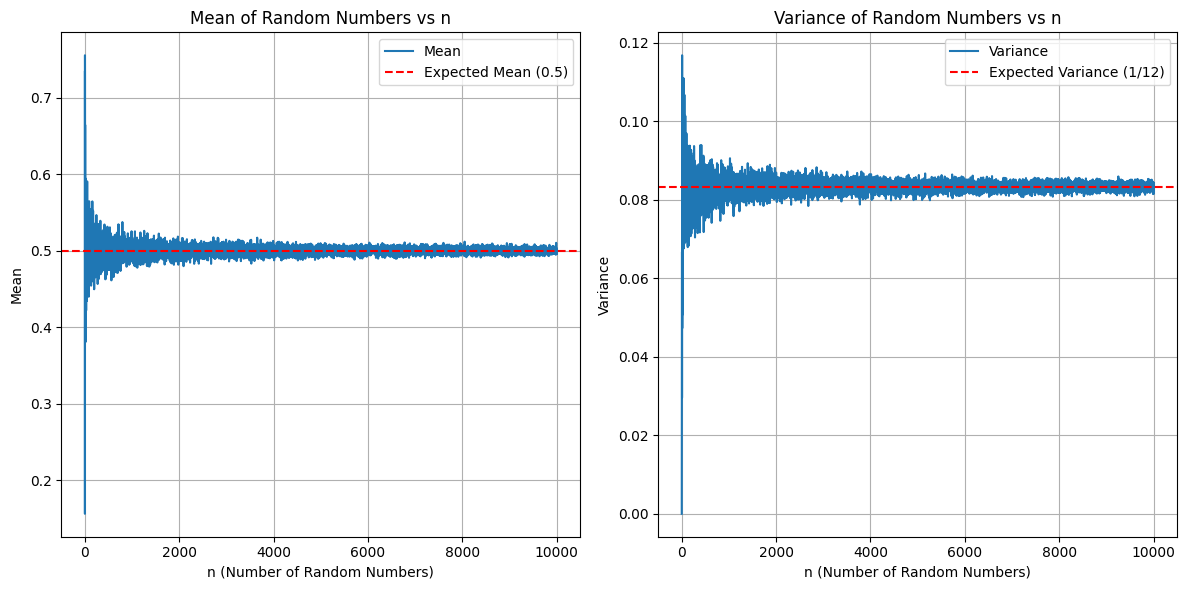

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_stats(max_n):
    means = []
    variances = []
    n_values = range(1, max_n + 1)

    for n in n_values:
        random_numbers = np.random.uniform(0, 1, n)
        means.append(np.mean(random_numbers))
        variances.append(np.var(random_numbers))

    return n_values, means, variances

max_n = 10000
n_values, means, variances = calculate_stats(max_n)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(n_values, means, label='Mean')
plt.axhline(0.5, color='red', linestyle='--', label='Expected Mean (0.5)')
plt.title("Mean of Random Numbers vs n")
plt.xlabel("n (Number of Random Numbers)")
plt.ylabel("Mean")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(n_values, variances, label='Variance')
plt.axhline(1/12, color='red', linestyle='--', label='Expected Variance (1/12)')
plt.title("Variance of Random Numbers vs n")
plt.xlabel("n (Number of Random Numbers)")
plt.ylabel("Variance")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


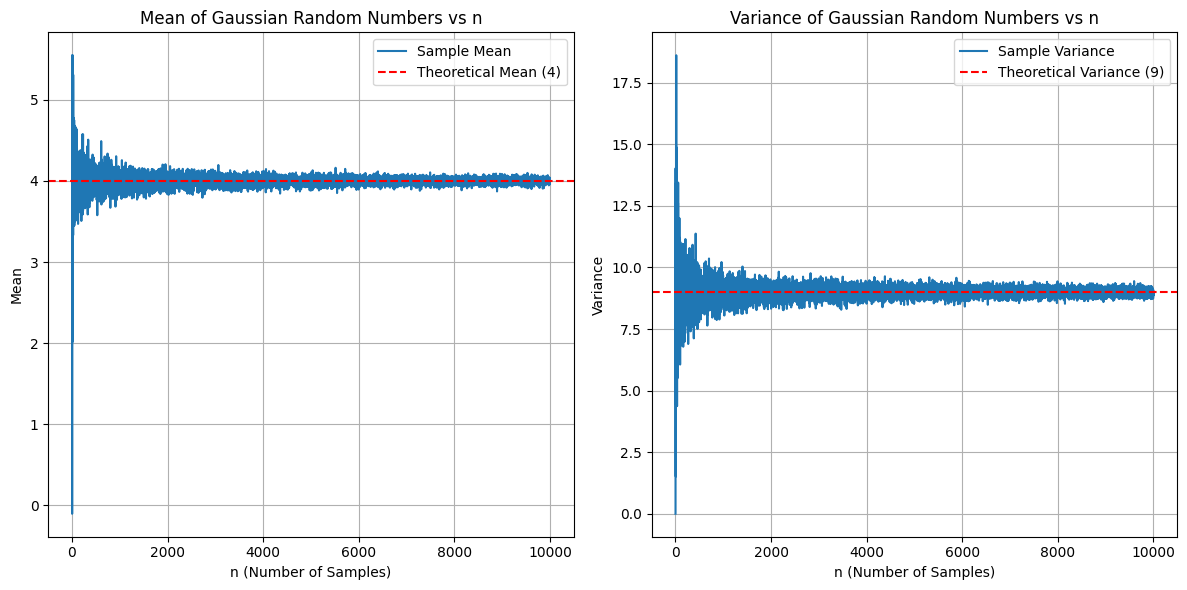

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate statistics for Gaussian distribution
def gaussian_stats(mean, std_dev, max_n):
    means = []
    variances = []
    n_values = range(1, max_n + 1)

    for n in n_values:
        # Generate n Gaussian random numbers
        random_numbers = np.random.normal(mean, std_dev, n)
        # Calculate mean and variance
        means.append(np.mean(random_numbers))
        variances.append(np.var(random_numbers))

    return n_values, means, variances

# Experiment parameters
mean = 4  # Mean of the Gaussian distribution
std_dev = 3  # Standard deviation of the Gaussian distribution
max_n = 10000  # Maximum number of random samples

# Perform the experiment
n_values, means, variances = gaussian_stats(mean, std_dev, max_n)

# Plotting results
plt.figure(figsize=(12, 6))

# Mean plot
plt.subplot(1, 2, 1)
plt.plot(n_values, means, label='Sample Mean')
plt.axhline(mean, color='red', linestyle='--', label=f'Theoretical Mean ({mean})')
plt.title("Mean of Gaussian Random Numbers vs n")
plt.xlabel("n (Number of Samples)")
plt.ylabel("Mean")
plt.legend()
plt.grid(True)

# Variance plot
plt.subplot(1, 2, 2)
plt.plot(n_values, variances, label='Sample Variance')
plt.axhline(std_dev**2, color='red', linestyle='--', label=f'Theoretical Variance ({std_dev**2})')
plt.title("Variance of Gaussian Random Numbers vs n")
plt.xlabel("n (Number of Samples)")
plt.ylabel("Variance")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
